In [498]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

plt.rcParams['figure.figsize']=(12.8, 7.2)
# 全局设置输出图片大小 1280 x 720 像素

In [499]:
def signal_sample(csignal, T, N):
    sample_signal = np.zeros(N,dtype='f')
    for n in range(N):
        sample_signal[n] = csignal(n*T)
    return sample_signal

In [500]:
def sgl_exp_sin(t):
    return A*np.exp(-alpha*t)*np.sin(omega0*t)

In [501]:
def dtft(xn):
    N = len(xn)
    n = np.arange(N)
    
    def X(w):
        len_out = len(w)
        result = np.zeros(len_out,dtype='complex')
        for i in range(len_out):
            e_w = np.exp(-1j*w[i]*n)
            result[i] = np.dot(xn,e_w)
        return result
    return X

In [502]:
def dft(x):
    N = len(x)
    n = np.arange(N)  #  n in 0, 1, ..., N-1
    
    Xk = np.zeros(N,dtype='complex')
    for k in range(N):
        w = np.exp(-2j * np.pi * n * k /N)
        Xk[k] = np.dot(x,w)
    return Xk

In [503]:
def draw_dft_abs(Xk):
    plt.stem(np.abs(Xk))

In [504]:
def draw_dtft(Xw):
    x_scale = np.linspace(-3*np.pi,3*np.pi,10000)
    plt.plot(x_scale,np.abs(Xw(x_scale)))

In [505]:
def dtft_analysis(xn):
    Xw = dtft(xn)
    draw_dtft(Xw)

In [506]:
def draw_dsignal(xn):
    plt.stem(xn)

# 1.3.2   理想采样信号序列的特性分析
![image-20221015092451566](https://gitee.com/aweary/img/raw/master/img/image-20221015092451566.png)

In [507]:
# 连续信号参数
A = 444.128
alpha = 50*np.pi*np.sqrt(2)
omega0 = 50*np.pi*np.sqrt(2)

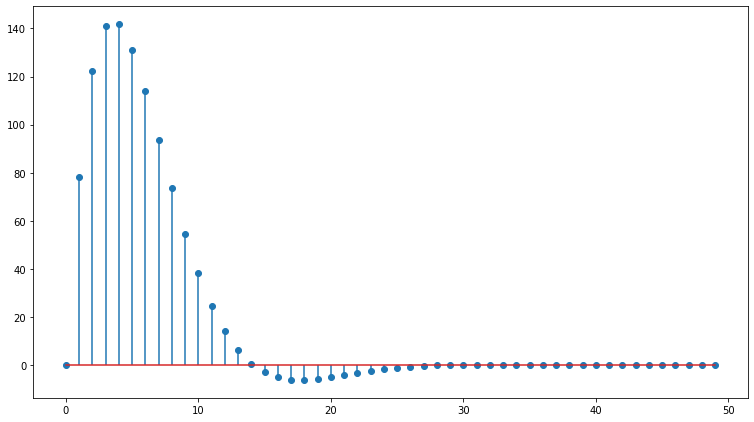

In [508]:
# T = 1/1000 
xa = signal_sample(sgl_exp_sin, 1/1000, 50)
draw_dsignal(xa)

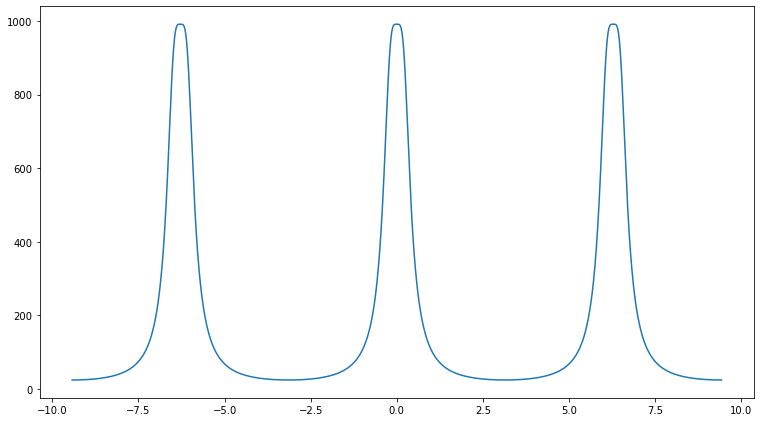

In [509]:
Xw = dtft(xa)
draw_dtft(Xw)

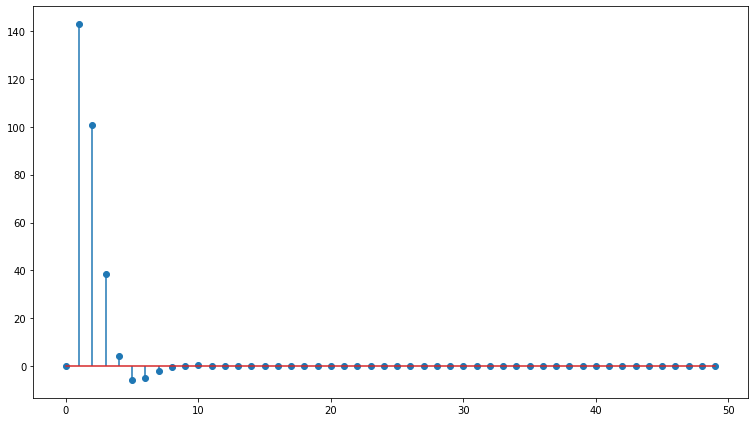

In [510]:
# T = 1/300 
xa = signal_sample(sgl_exp_sin, 1/300, 50)
draw_dsignal(xa)

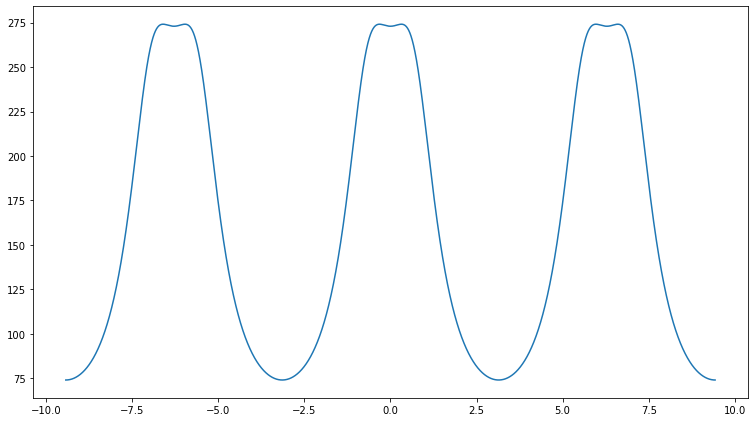

In [511]:
Xw = dtft(xa)
draw_dtft(Xw)

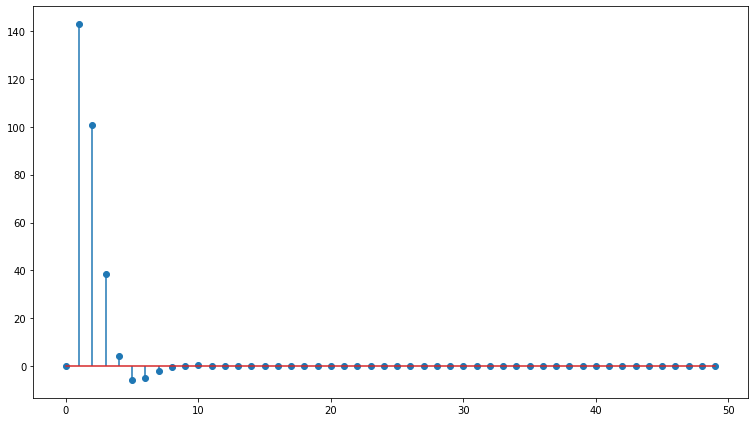

In [512]:
# T = 1/200
xa = signal_sample(sgl_exp_sin, 1/300, 50)
draw_dsignal(xa)

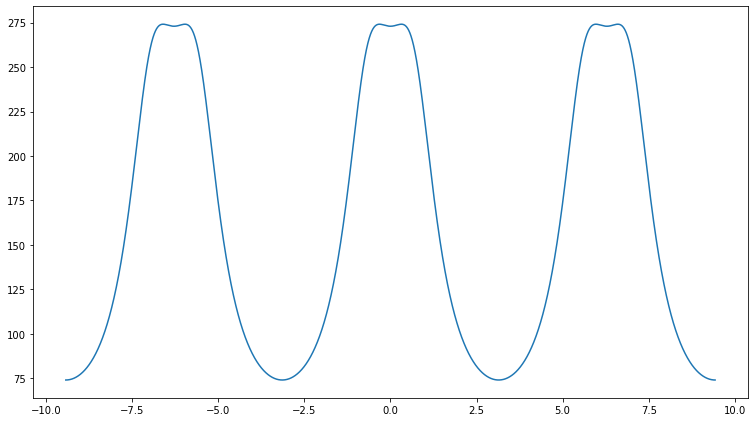

In [513]:
Xw = dtft(xa)
draw_dtft(Xw)

# 1.3.3   典型信号序列的特性分析
### 1.3.3.2 观察高斯序列的时域和频域特性
![image-20221015092400771](https://gitee.com/aweary/img/raw/master/img/image-20221015092400771.png)

In [514]:
def gauss_sequence(N,p,q):
    n = np.arange(N)
    return np.exp(-((n-p)**2)/q)

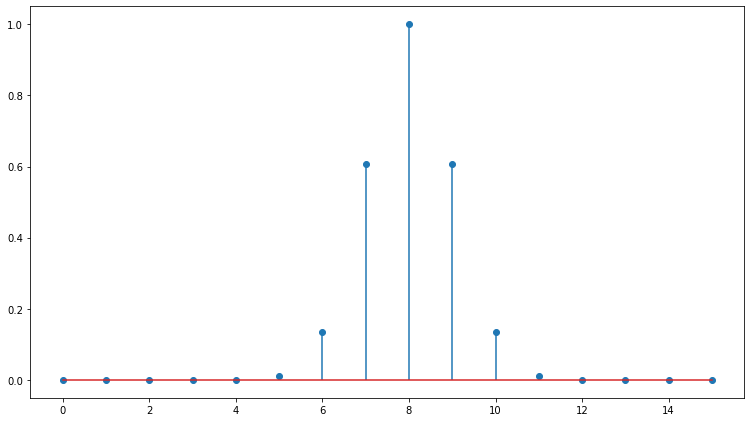

In [515]:
xaa = gauss_sequence(16,8,2)
draw_dsignal(xaa)

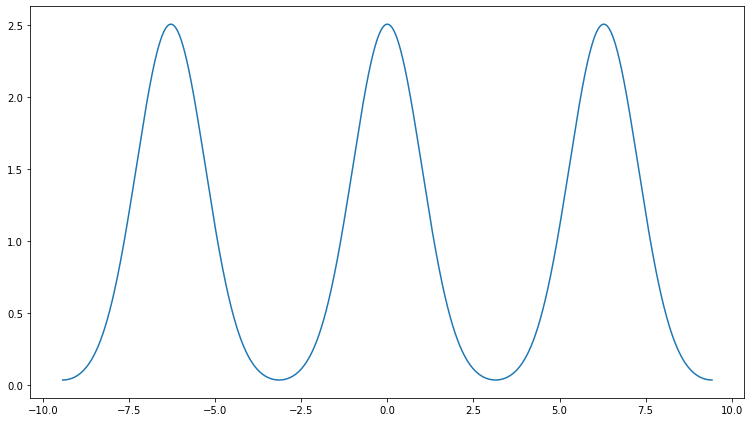

In [516]:
dtft_analysis(xaa)

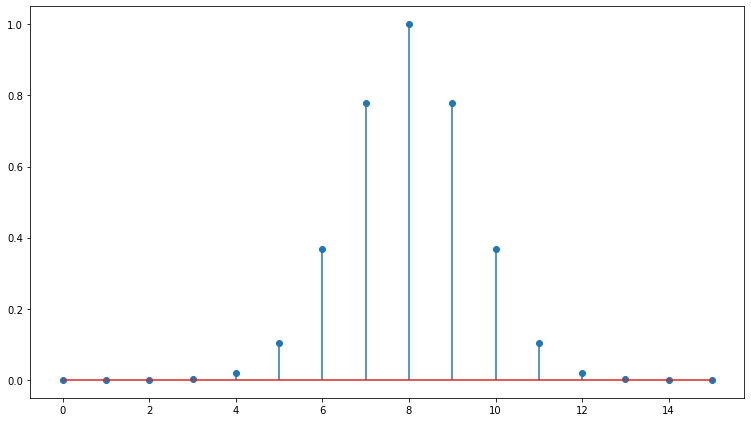

In [517]:
xaa = gauss_sequence(16,8,4)
draw_dsignal(xaa)

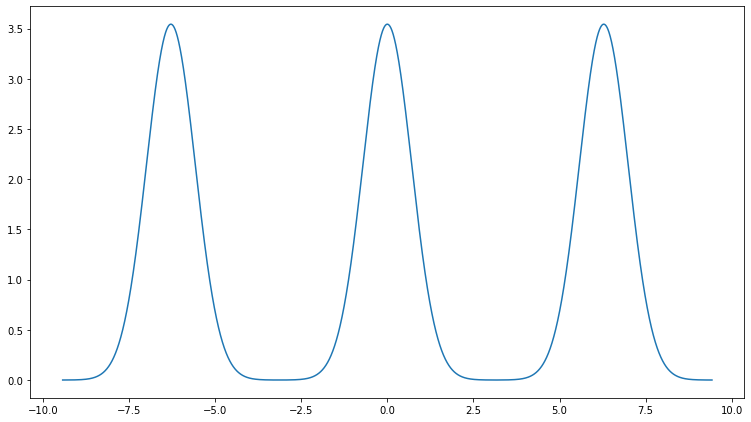

In [518]:
dtft_analysis(xaa)

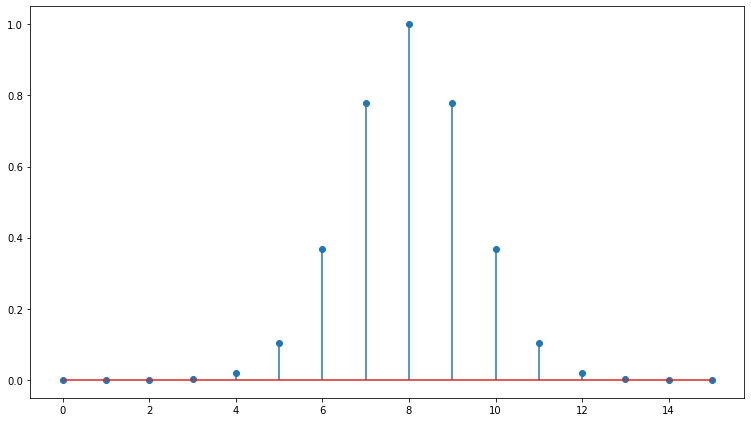

In [519]:
xaa = gauss_sequence(16,8,4)
draw_dsignal(xaa)

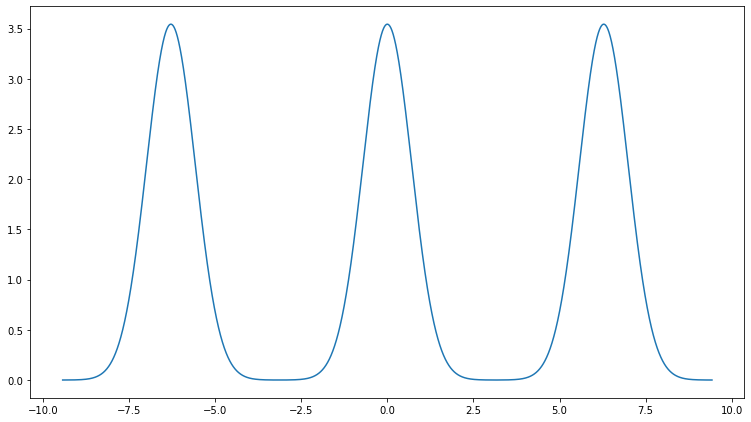

In [520]:
dtft_analysis(xaa)

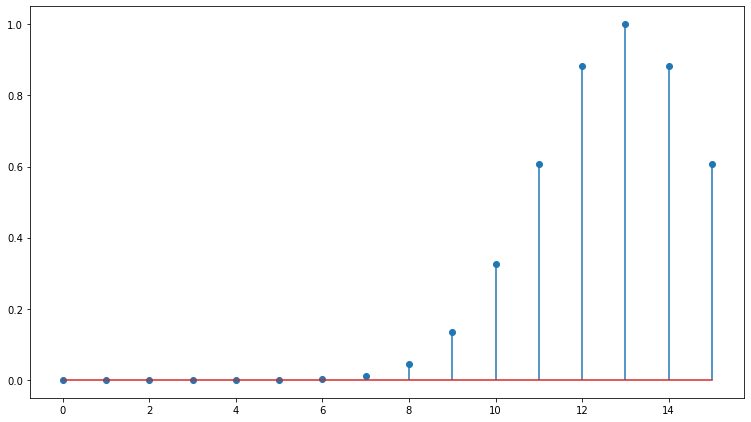

In [521]:
xaa = gauss_sequence(16,13,8)
draw_dsignal(xaa)

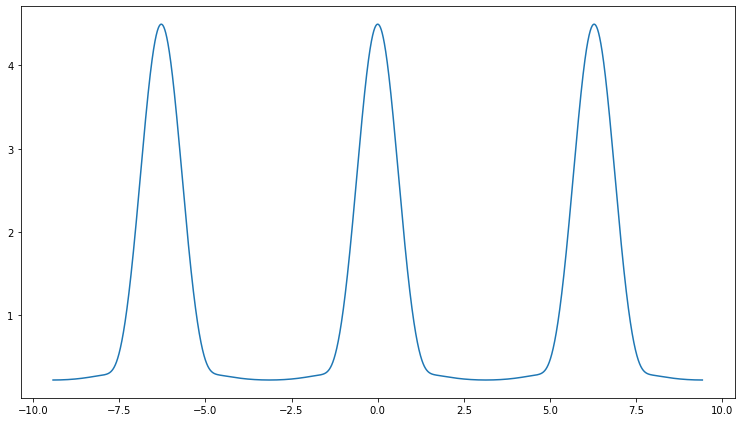

In [522]:
dtft_analysis(xaa)

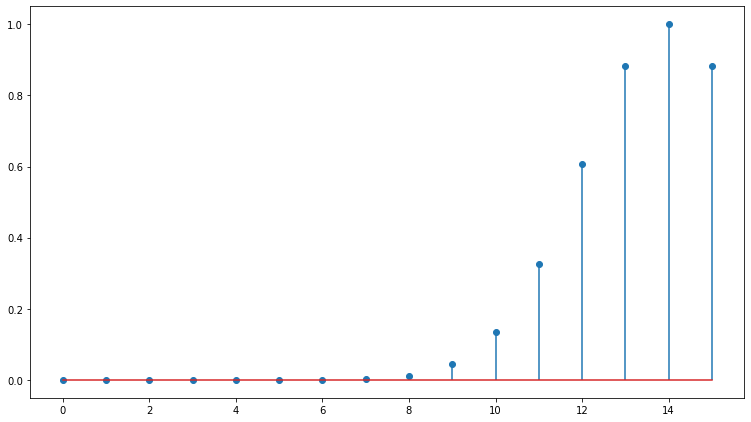

In [523]:
xaa = gauss_sequence(16,14,8)
draw_dsignal(xaa)

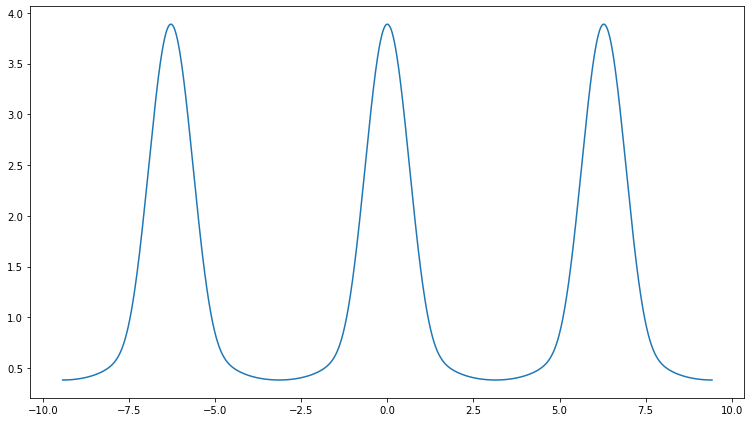

In [524]:
dtft_analysis(xaa)

### 1.3.3.3 观察衰减正弦序列的时域和幅频特性

![image-20221015093722741](https://gitee.com/aweary/img/raw/master/img/image-20221015093722741.png)

In [525]:
def sin_decay_sequence(N,alpha,f):
    n = np.arange(N)
    return np.exp(-alpha*n)*np.sin(2*np.pi*f*n)

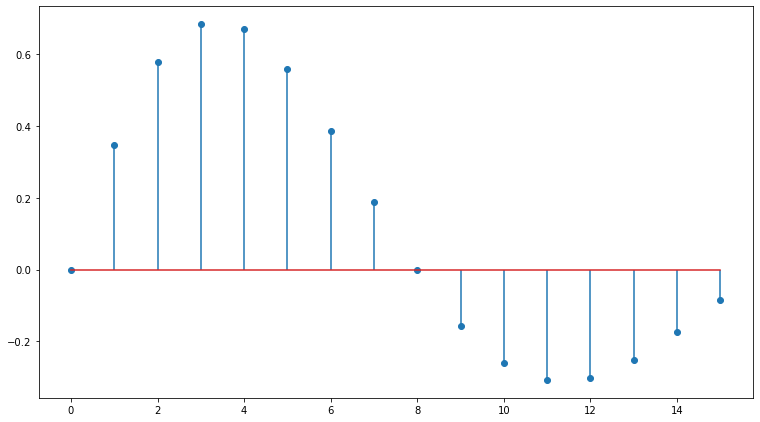

In [526]:
xbb = sin_decay_sequence(16,0.1,0.0625)
draw_dsignal(xbb)

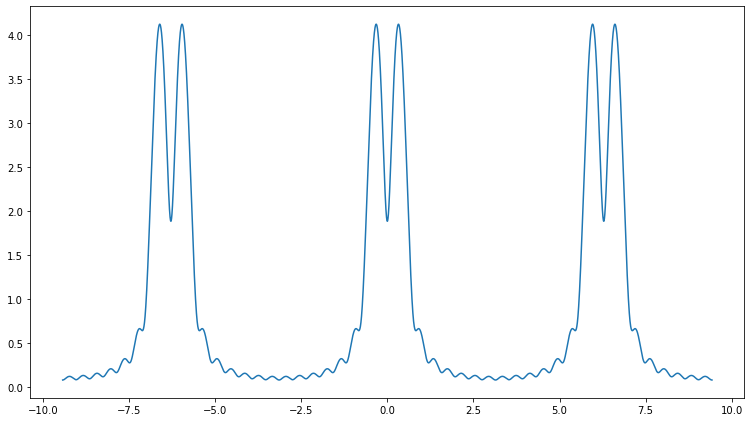

In [527]:
dtft_analysis(xbb)

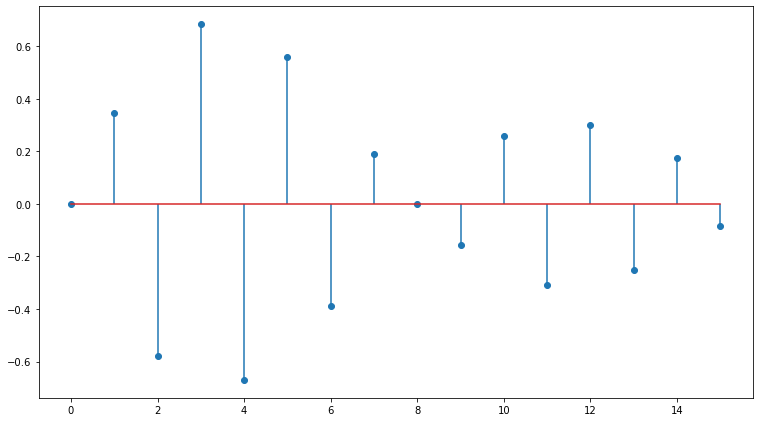

In [528]:
xbb = sin_decay_sequence(16,0.1,0.4375)
draw_dsignal(xbb)

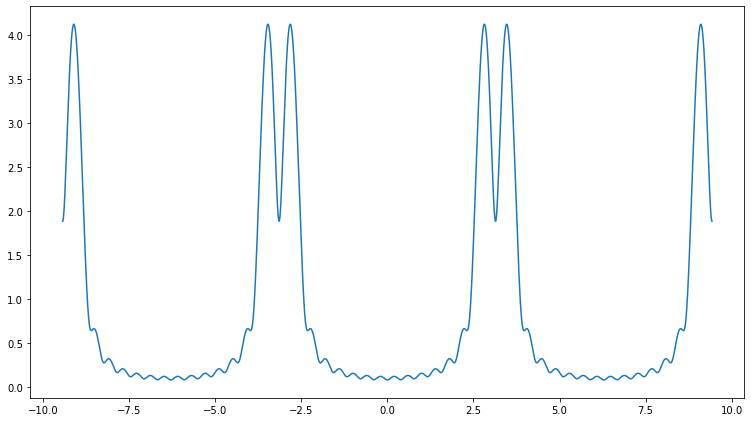

In [529]:
dtft_analysis(xbb)

### 1.3.3.4 观察三角波序列和反三角波序列的时域和幅频特性
![image-20221015094503327](https://gitee.com/aweary/img/raw/master/img/image-20221015094503327.png)

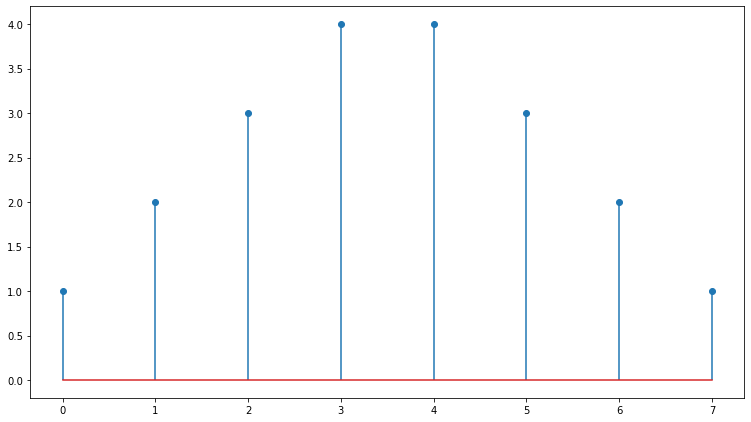

In [530]:
xcc = np.array([1,2,3,4,4,3,2,1])
draw_dsignal(xcc)


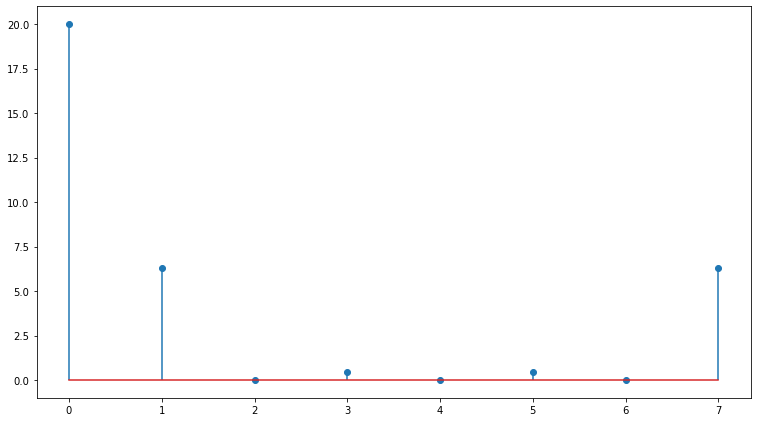

In [534]:
draw_dft_abs(fft(xcc))

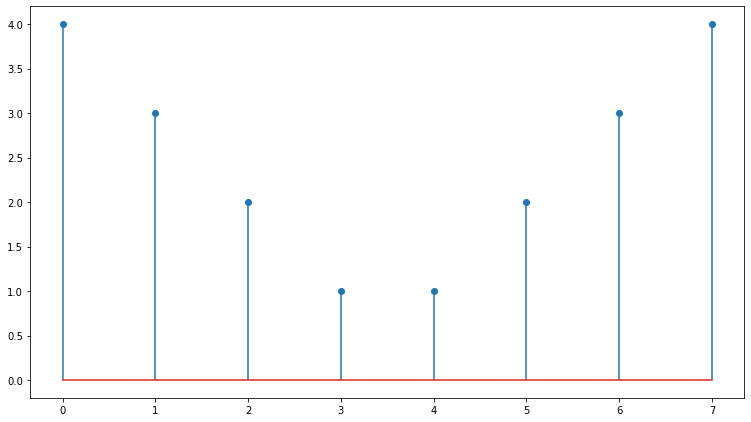

In [531]:
xdd = np.array([4,3,2,1,1,2,3,4])
draw_dsignal(xdd)


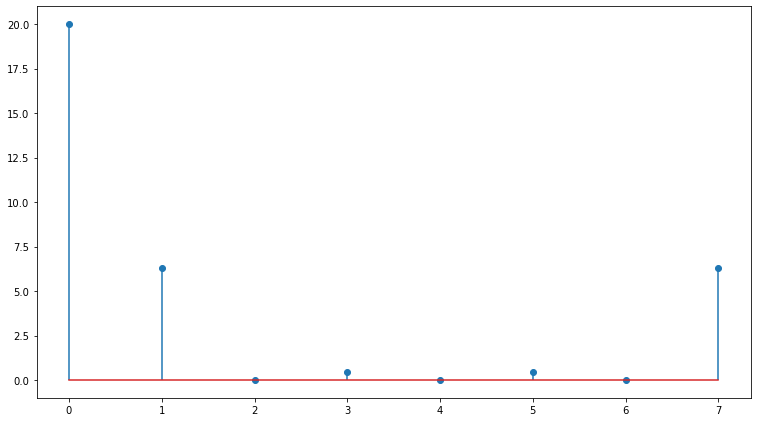

In [532]:
draw_dft_abs(fft(xdd))

三角序列末尾补零

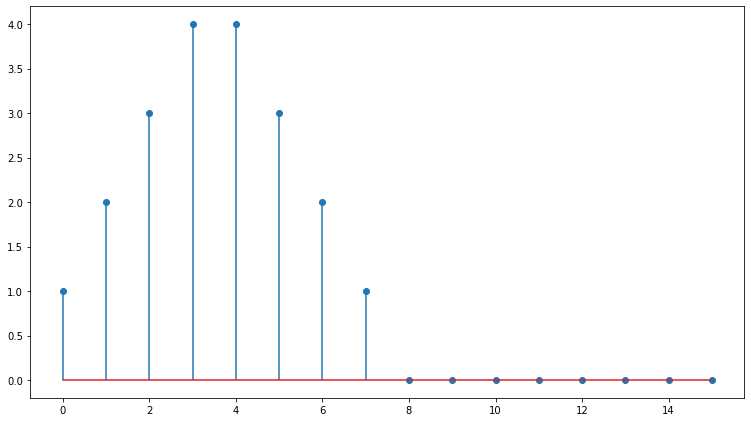

In [535]:
xcc = np.concatenate((xcc,np.zeros(8)))
draw_dsignal(xcc)

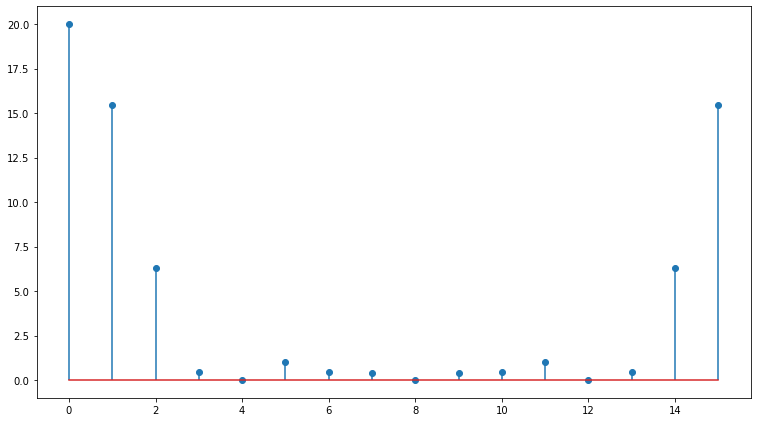

In [538]:
draw_dft_abs(fft(xcc))

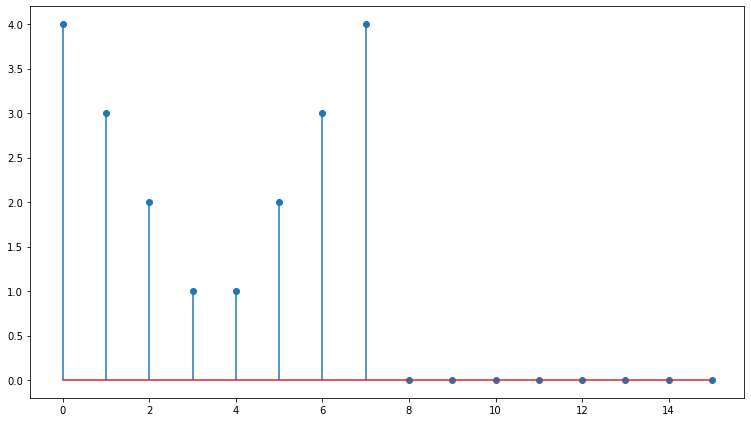

In [536]:
xdd = np.concatenate((xdd,np.zeros(8)))
draw_dsignal(xdd)

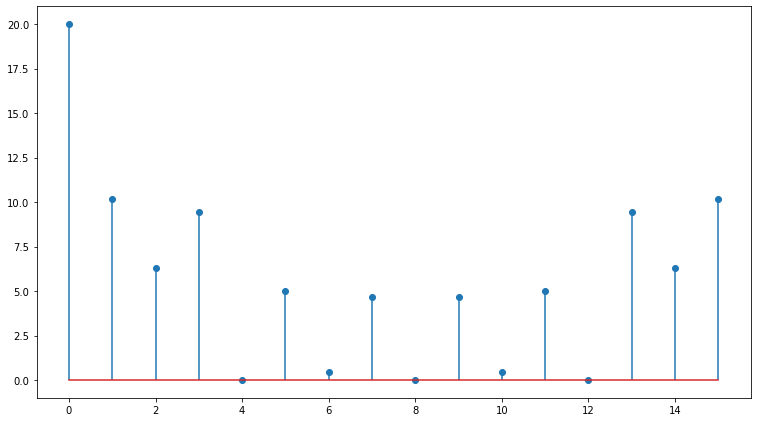

In [537]:
draw_dft_abs(fft(xdd))

![image-20221015100603469](https://gitee.com/aweary/img/raw/master/img/image-20221015100603469.png)

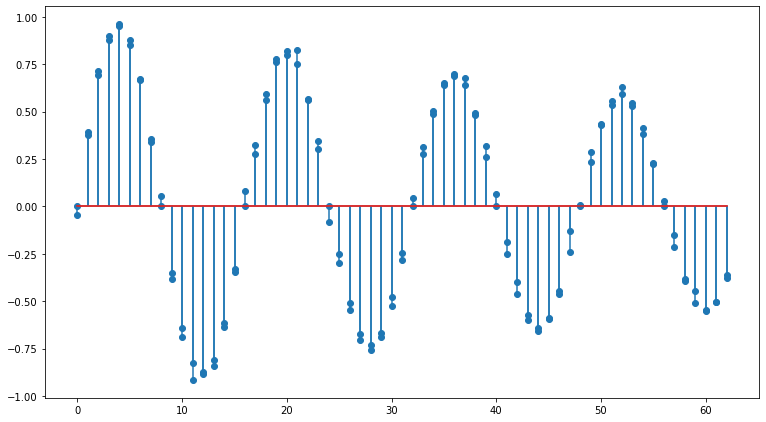

In [554]:
xb = sin_decay_sequence(63,0.01,0.0625)
draw_dsignal(xb)
wn = np.random.randn(63)
yn = wn/20 + xb
draw_dsignal(yn)


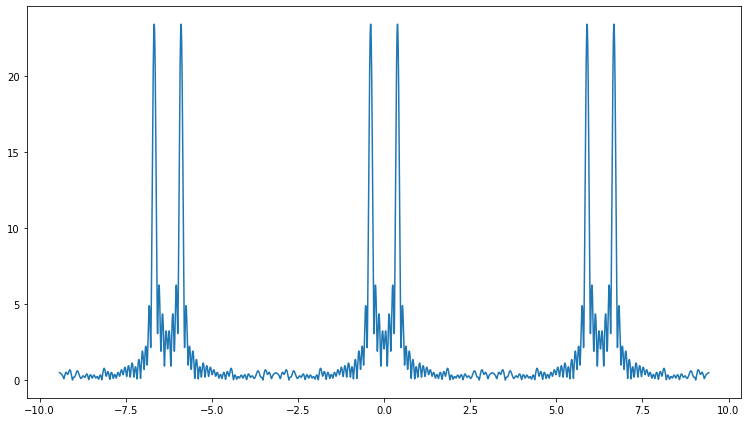

In [555]:
dtft_analysis(yn)

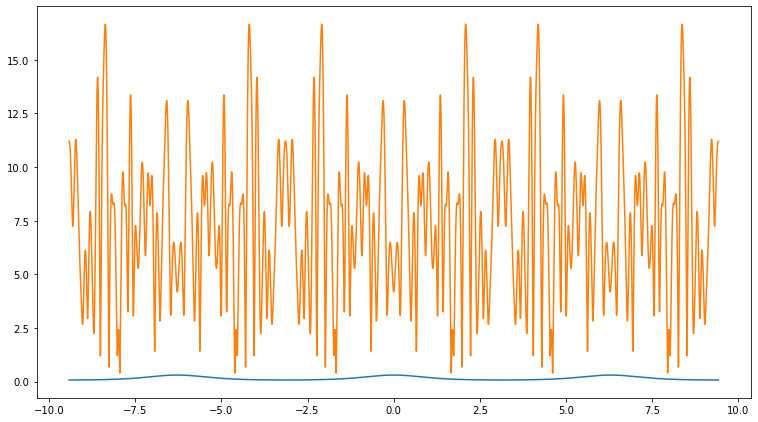

In [548]:
xb = sin_decay_sequence(63,0.1,0.0625)
dtft_analysis(xb)


dtft_analysis(yn)

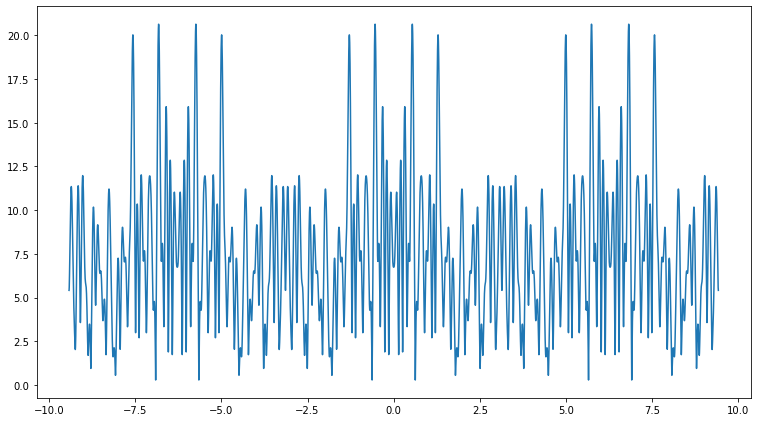

In [545]:

wn = np.random.randn(63)
yn = wn + xb
dtft_analysis(yn)

# 1.3.4   离散信号、系统和系统响应的分析
![image-20221015101522956](https://gitee.com/aweary/img/raw/master/img/image-20221015101522956.png)

In [ ]:
xb = 

![image-20221015101607388](https://gitee.com/aweary/img/raw/master/img/image-20221015101607388.png)

![image-20221015101644819](https://gitee.com/aweary/img/raw/master/img/image-20221015101644819.png)